In [1]:
import sys
sys.path.append('..')

from src.models.ensemble_models import EnsembleModels
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load processed data
X_train = np.load('../data/processed/X_train.npy')
X_test = np.load('../data/processed/X_test.npy')
y_train = np.load('../data/processed/y_train.npy')
y_test = np.load('../data/processed/y_test.npy')

print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")
print("✓ Data loaded")

Training set: (238, 13)
Test set: (61, 13)
✓ Data loaded


In [2]:
# Initialize ensemble models
ensemble = EnsembleModels(random_state=42)

# Train all ensemble models
ensemble.train_all(X_train, y_train)

TRAINING ENSEMBLE MODELS

Training Voting Ensemble...
✓ Voting Ensemble trained

Training Stacking Ensemble...
✓ Stacking Ensemble trained


In [3]:
# Evaluate ensemble models
results = ensemble.evaluate_all(X_test, y_test)


EVALUATING ENSEMBLE MODELS

Voting (Soft):
  accuracy: 0.8361
  precision: 0.7647
  recall: 0.9286
  f1_score: 0.8387
  roc_auc: 0.9470

Stacking:
  accuracy: 0.8361
  precision: 0.7647
  recall: 0.9286
  f1_score: 0.8387
  roc_auc: 0.9329


In [4]:
# Create results dataframe
results_df = pd.DataFrame(results).T
results_df = results_df.round(4)

print("\n" + "="*70)
print("ENSEMBLE MODELS RESULTS")
print("="*70)
print(results_df)

# Compare with best individual models
print("\n" + "="*70)
print("COMPARISON WITH BEST INDIVIDUAL MODELS")
print("="*70)
print("Naive Bayes ROC-AUC: 0.9481")
print("LightGBM ROC-AUC: 0.9459")
print("Random Forest ROC-AUC: 0.9410")
print(f"\nVoting Ensemble ROC-AUC: {results_df.loc['Voting (Soft)', 'roc_auc']:.4f}")
print(f"Stacking Ensemble ROC-AUC: {results_df.loc['Stacking', 'roc_auc']:.4f}")


ENSEMBLE MODELS RESULTS
               accuracy  precision  recall  f1_score  roc_auc
Voting (Soft)    0.8361     0.7647  0.9286    0.8387   0.9470
Stacking         0.8361     0.7647  0.9286    0.8387   0.9329

COMPARISON WITH BEST INDIVIDUAL MODELS
Naive Bayes ROC-AUC: 0.9481
LightGBM ROC-AUC: 0.9459
Random Forest ROC-AUC: 0.9410

Voting Ensemble ROC-AUC: 0.9470
Stacking Ensemble ROC-AUC: 0.9329


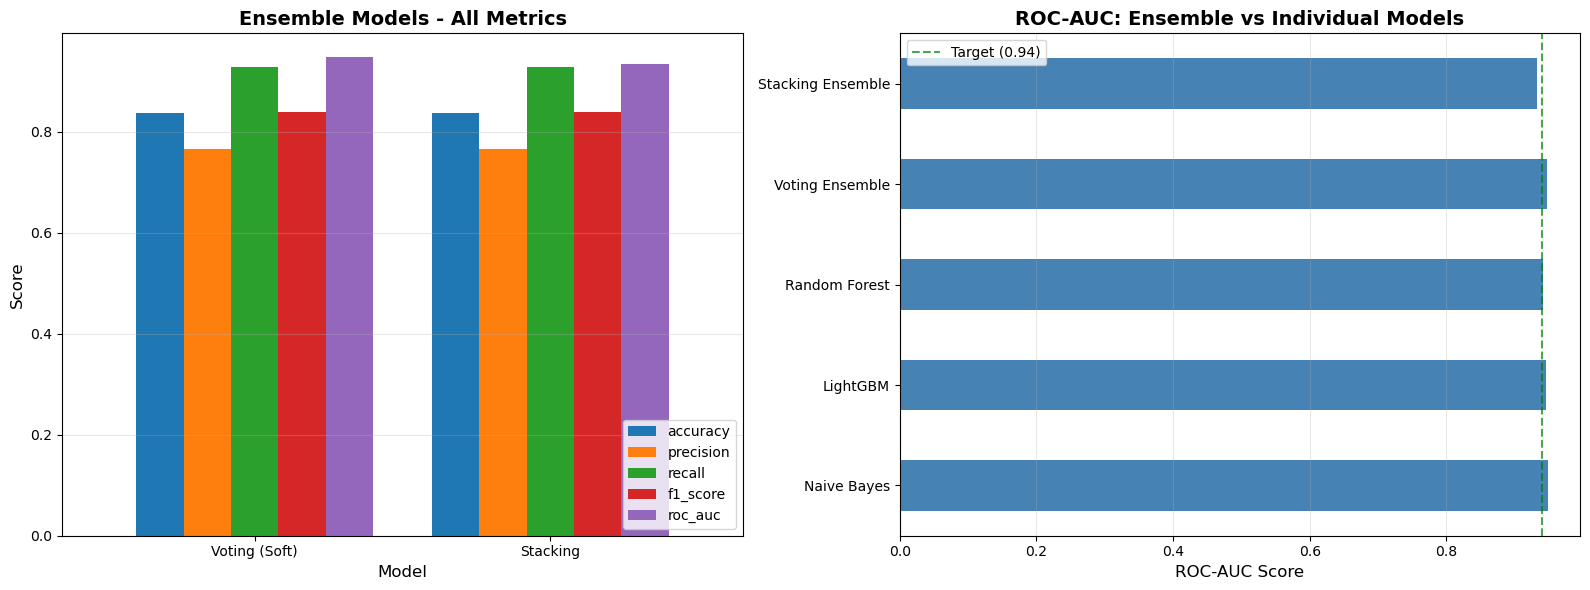

In [5]:
# Visualize ensemble performance
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: All metrics
results_df.plot(kind='bar', ax=axes[0], width=0.8)
axes[0].set_title('Ensemble Models - All Metrics', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Model', fontsize=12)
axes[0].set_ylabel('Score', fontsize=12)
axes[0].legend(loc='lower right')
axes[0].set_xticklabels(results_df.index, rotation=0)
axes[0].grid(axis='y', alpha=0.3)

# Plot 2: ROC-AUC comparison with best individual models
comparison_data = {
    'Naive Bayes': 0.9481,
    'LightGBM': 0.9459,
    'Random Forest': 0.9410,
    'Voting Ensemble': results_df.loc['Voting (Soft)', 'roc_auc'],
    'Stacking Ensemble': results_df.loc['Stacking', 'roc_auc']
}

pd.Series(comparison_data).plot(kind='barh', ax=axes[1], color='steelblue')
axes[1].set_title('ROC-AUC: Ensemble vs Individual Models', fontsize=14, fontweight='bold')
axes[1].set_xlabel('ROC-AUC Score', fontsize=12)
axes[1].axvline(x=0.94, color='green', linestyle='--', alpha=0.7, label='Target (0.94)')
axes[1].legend()
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

In [6]:
# Save ensemble models
ensemble.save_models(filepath='../results/models/ensemble_models.pkl')

print("\n✓ All ensemble models completed and saved!")


✓ Ensemble models saved to ../results/models/ensemble_models.pkl

✓ All ensemble models completed and saved!
